In [1]:
#import the ZL updated metadata with IHC alreayd excluded
#exclude the 29 cibersort scores, leaving only 3
#exclude NaN, before proceeding further
import pandas as pd
df_input=pd.read_csv("data_updated230524_new_excludedIHC.tsv",sep="\t")
df_input=df_input.drop(columns=['Bindea_full', 'Expanded_IFNg', 
        'C_Bcellsmemory','C_Plasmacells','C_TcellsCD8','C_TcellsCD4naive',
         'C_TcellsCD4memoryactivated','C_Tcellsfollicularhelper',
         'C_Tcellsregulatory(Tregs)','C_Tcellsgammadelta','C_NKcellsresting',
         'C_NKcellsactivated', 'C_Monocytes', 'C_MacrophagesM0',
         'C_MacrophagesM1','C_Dendriticcellsresting',
         'C_Dendriticcellsactivated', 'C_Mastcellsresting',
         'C_Mastcellsactivated','C_Eosinophils', 'C_Neutrophils'])
df_input=df_input.dropna()

#----------------------------------
df_input_clean=df_input.copy() #save a copy of the cleanedup but unmodified version
#----------------------------------


#this point onwards, a seperate df for yj+z :)
#clean-up-non-numerical-for-z-transformation
df_input["HR_status"] = df_input["HR_status"].replace("HR+", 1)
df_input["HR_status"] = df_input["HR_status"].replace("HR-", 0)
df_input["HER_status"] = df_input["HER_status"].replace("HER2+", 1)
df_input["HER_status"] = df_input["HER_status"].replace("HER2-", 0)

df_input["Subtype"] = df_input["Subtype"].replace("TNBC", 0)
df_input["Subtype"] = df_input["Subtype"].replace("HR+/HER2-", 1)
df_input["Subtype"] = df_input["Subtype"].replace("HR-/HER2+", 2)
df_input["Subtype"] = df_input["Subtype"].replace("HR+/HER2+", 3)

df_input["PAM50"] = df_input["PAM50"].replace("Basal", 0)
df_input["PAM50"] = df_input["PAM50"].replace("LumA", 1)
df_input["PAM50"] = df_input["PAM50"].replace("Her2", 2)
df_input["PAM50"] = df_input["PAM50"].replace("LumB", 3)
df_input["PAM50"] = df_input["PAM50"].replace("Normal", 4)

df_input["Batch"] = df_input["Batch"].replace("Batch_1", 1)
df_input["Batch"] = df_input["Batch"].replace("Batch_2", 0)

# '41-50', '51-60', '61-70', '31-40', '21-30', '81-90', '71-80'
df_input["AgeGroup"] = df_input["AgeGroup"].replace("21-30", 1)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("31-40", 2)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("41-50", 3)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("51-60", 4)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("61-70", 5)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("71-80", 6)
df_input["AgeGroup"] = df_input["AgeGroup"].replace("81-90", 7)

In [10]:
#separate them into batch1 and batch2

#the unmodified version - raw scores
df_input_clean_b1=df_input_clean[df_input_clean['Batch']=='Batch_1']
df_input_clean_b2=df_input_clean[df_input_clean['Batch']=='Batch_2']

#the version to be modified - for YJ + Z transformation
#column 6 onwards to only include continuous data for yj transformation
df_input_b1=df_input[df_input['Batch']==1].iloc[:,6:].astype('float64')
df_input_b2=df_input[df_input['Batch']==0].iloc[:,6:].astype('float64')


In [11]:
df_input_b2

,Age,AgeGroup,Stage,TumorGrade,TumourSize,FusionNeo_Count,FusionNeo_bestScore,FusionTransscript_Count,Fusion_T2NeoRate,SNVindelNeo_Count,...,S_Eosinophils,S_Macrophages,S_Mast,S_Neutrophils,S_Bindea_full,S_Expanded_IFNg,S_KEGG_MMR,S_KEGG_TGF_Beta,S_KEGG_Cytosolic_DNA_Sensing,S_PAM100HRD
520,40.0,2.0,2.0,2.0,2.2,3.0,16.99,4.0,0.750000,1885.0,...,0.3016,0.3415,0.2489,0.2806,0.3125,0.3429,0.4177,0.3532,0.2623,0.3218
522,41.0,3.0,3.0,3.0,4.0,18.0,22.07,63.0,0.285714,337.0,...,0.2958,0.3553,0.2418,0.2755,0.3162,0.3929,0.3993,0.3283,0.2732,0.3025
523,59.0,4.0,3.0,3.0,2.5,38.0,3.62,81.0,0.469136,244.0,...,0.3176,0.3825,0.2136,0.2905,0.3268,0.4062,0.4030,0.3408,0.2671,0.2966
528,53.0,4.0,2.0,3.0,2.5,26.0,5.04,42.0,0.619048,485.0,...,0.3106,0.4007,0.2267,0.2853,0.3180,0.3780,0.4008,0.3478,0.2616,0.3053
529,50.0,3.0,4.0,3.0,9.0,11.0,12.19,25.0,0.440000,227.0,...,0.2977,0.3624,0.2137,0.2524,0.3079,0.3623,0.4039,0.3448,0.2763,0.3044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962,46.0,3.0,2.0,3.0,2.8,11.0,2.81,34.0,0.323529,2315.0,...,0.3308,0.3564,0.2627,0.2654,0.3233,0.3989,0.4142,0.3444,0.2684,0.2808
964,72.0,6.0,4.0,2.0,3.0,13.0,9.51,33.0,0.393939,512.0,...,0.3171,0.3629,0.2257,0.2302,0.2934,0.3086,0.4236,0.3489,0.2568,0.2752
965,50.0,3.0,1.0,2.0,2.0,4.0,11.17,3.0,1.333333,26.0,...,0.3225,0.3916,0.3130,0.3030,0.3316,0.3701,0.3928,0.3509,0.2660,0.3329
966,49.0,3.0,2.0,2.0,3.5,12.0,43.78,52.0,0.230769,80.0,...,0.3413,0.3496,0.2730,0.2748,0.3238,0.3560,0.3815,0.3596,0.2491,0.3022


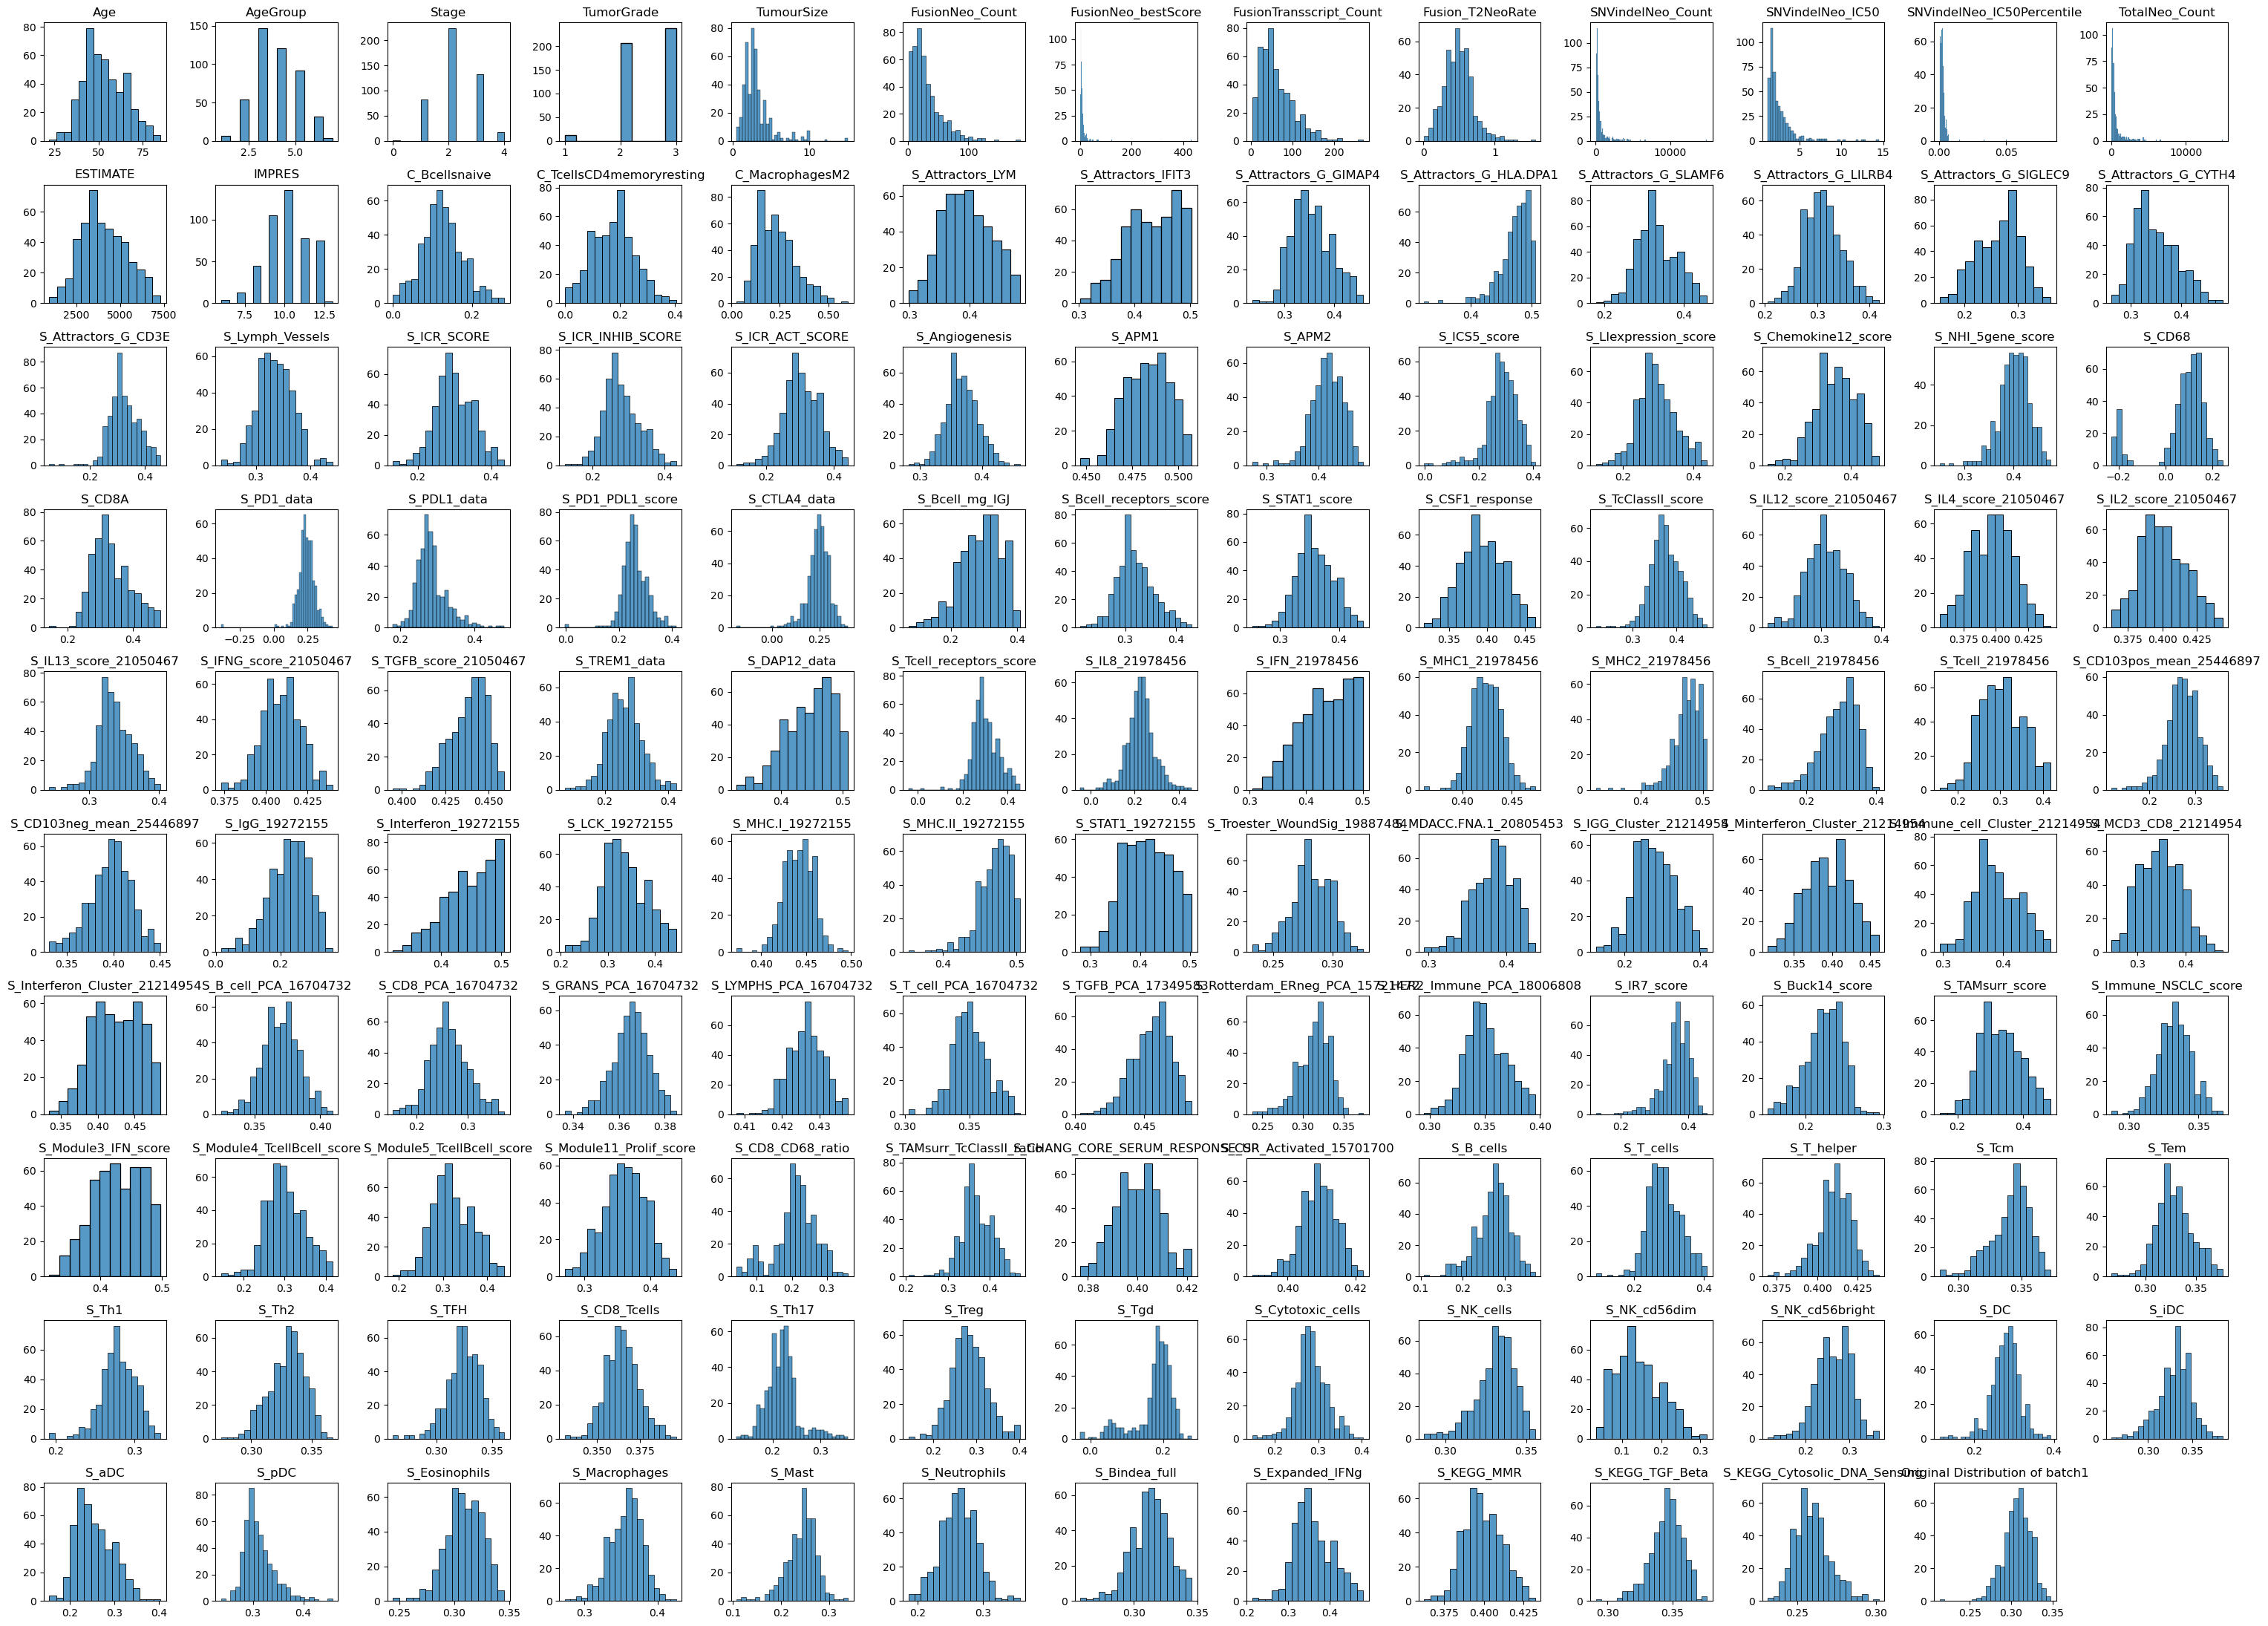

<Figure size 640x480 with 0 Axes>

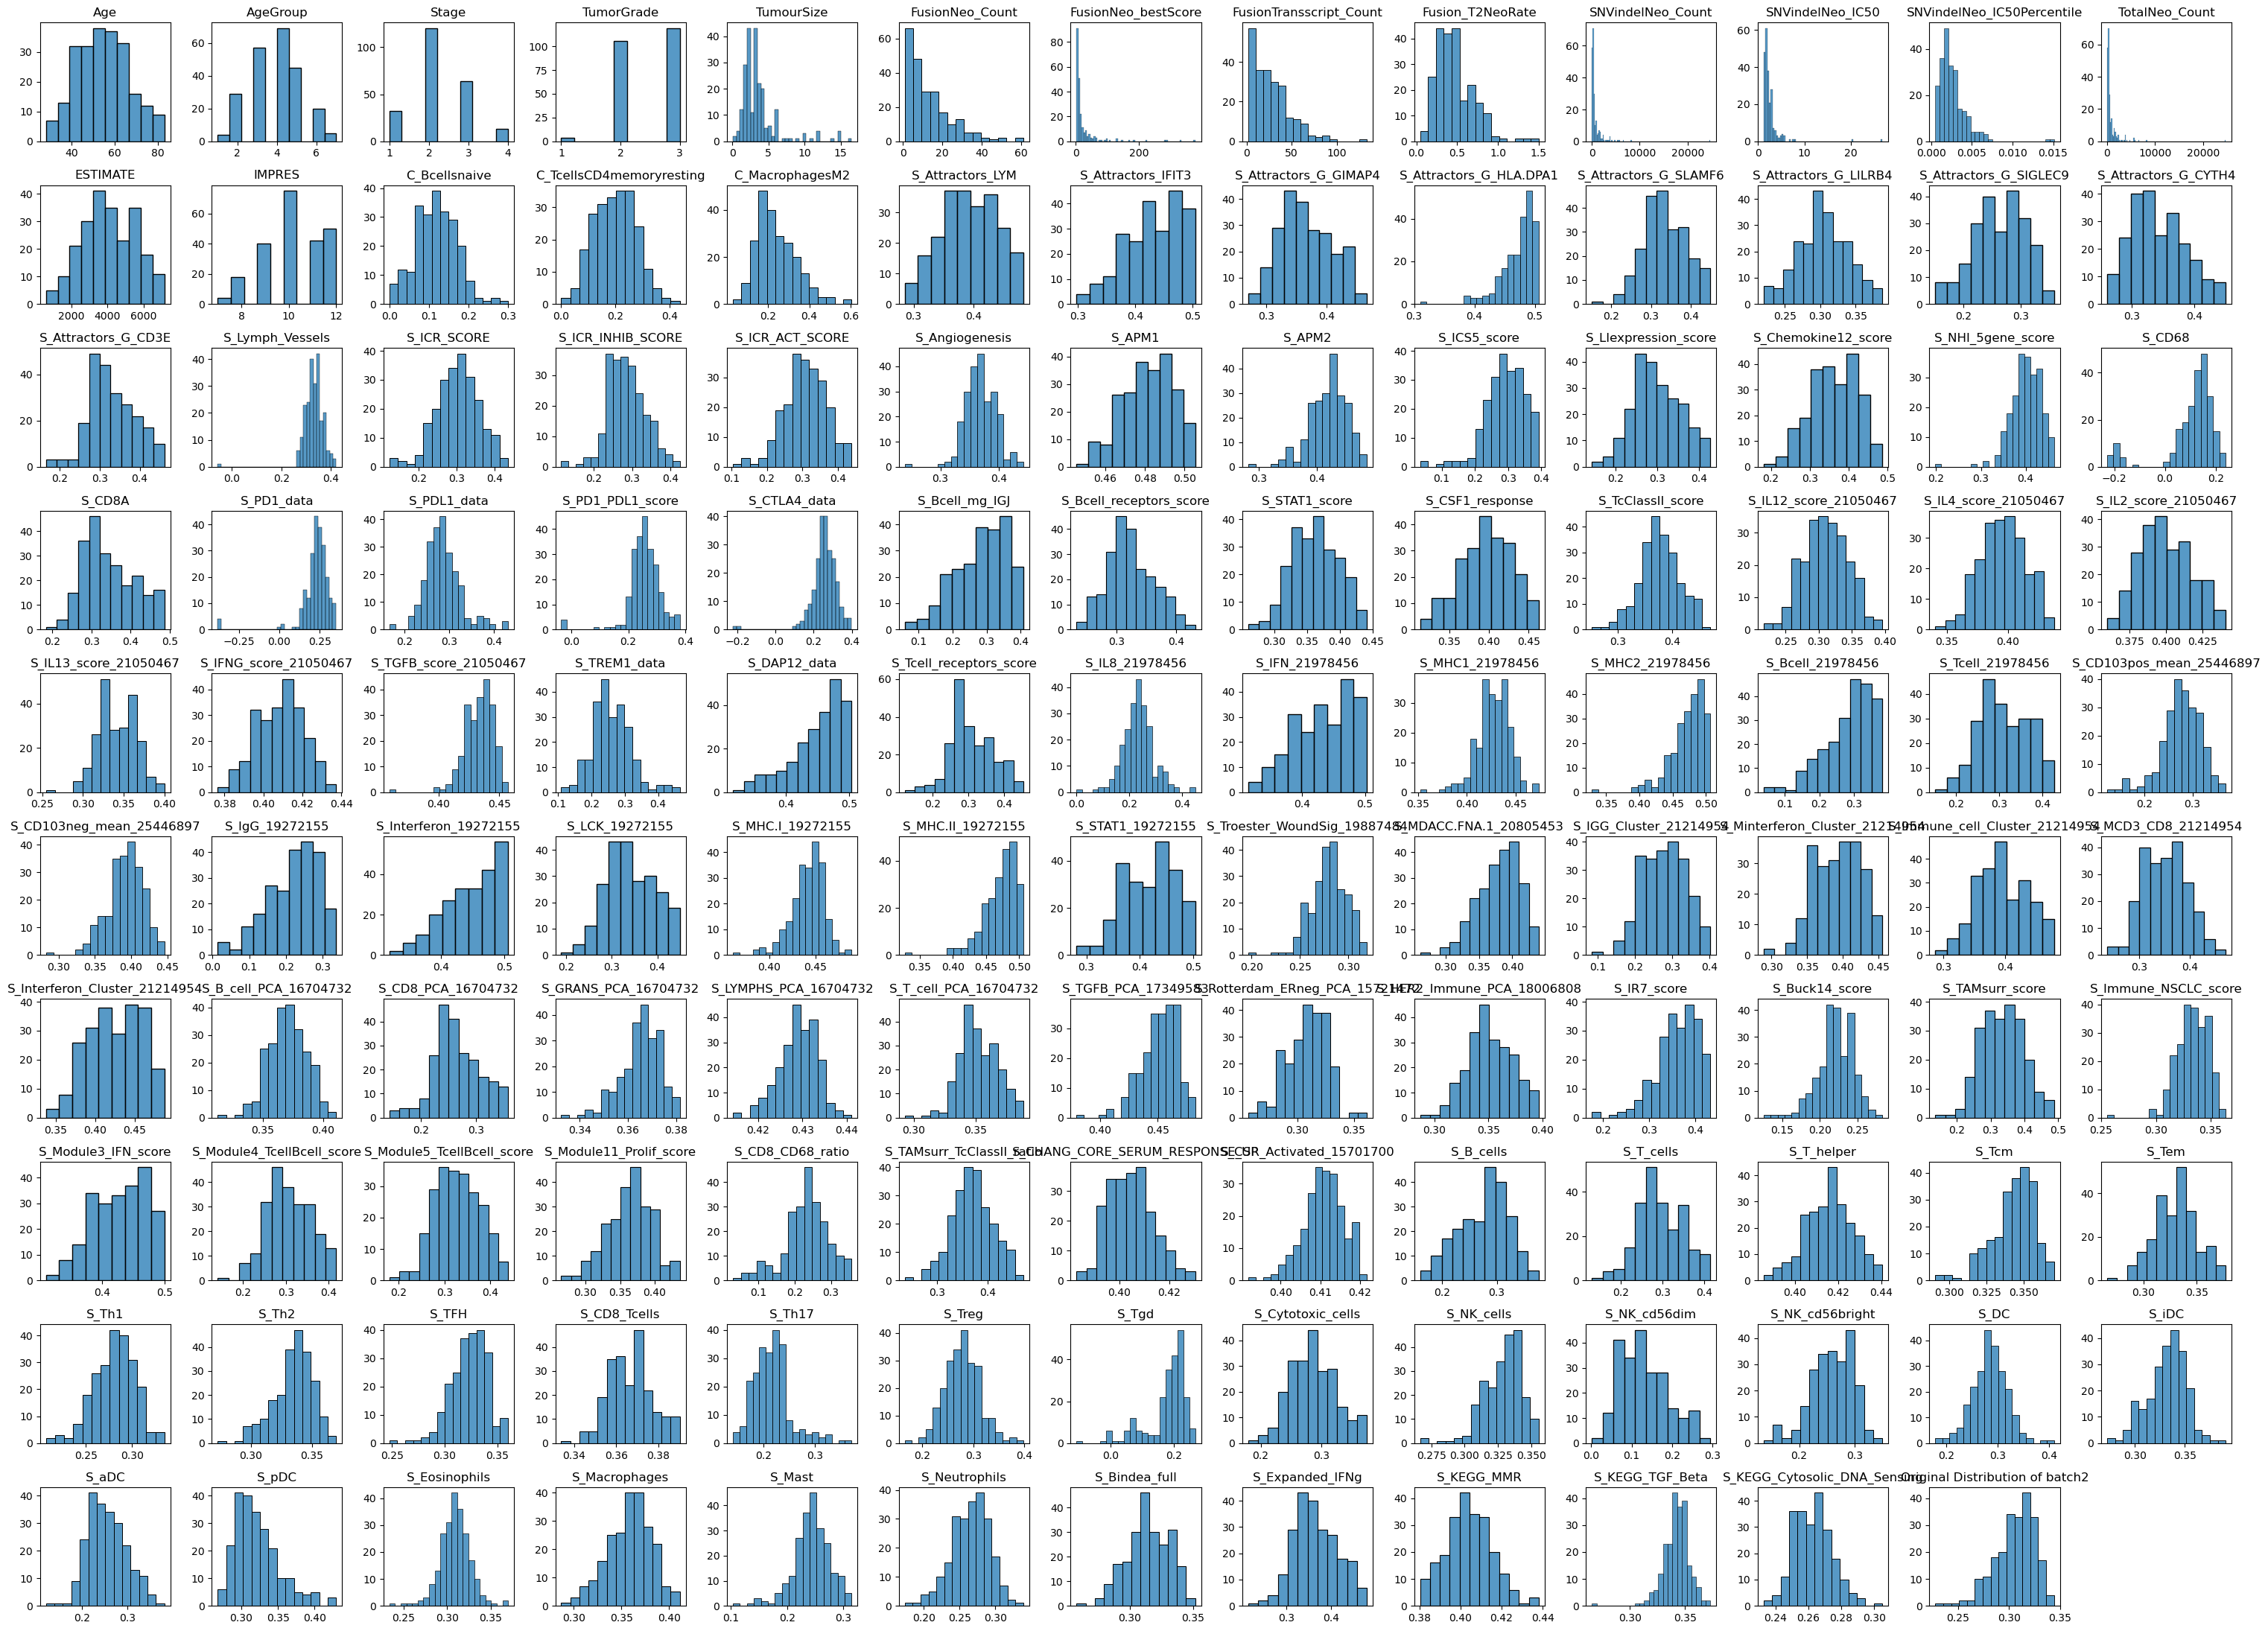

<Figure size 640x480 with 0 Axes>

In [21]:
#visualise original distribution
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
nrows = 10
ncols = 13

#define the plotting function
def visualise_distribution(df,batch):
    # Create a figure and a grid of subplots
    # Flatten the axes array for easy iteration
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 22))
    axes = axes.flatten()

    # Plot histograms for each column
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=False, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout
    plt.tight_layout()
    plt.title(f'Original Distribution of batch{batch}')
    plt.savefig(f'distribution_before_b{batch}.png',dpi=600)
    plt.show()
    plt.clf()

#execute the function
visualise_distribution(df_input_b1,1)
visualise_distribution(df_input_b2,2)

In [12]:
#YJ transformation (aka. normalisation) of df_input_b1  AND df_input_b2
from scipy import stats
yeo_johnson = lambda x: stats.yeojohnson(x)[0]
df_input_yj_b1=df_input_b1.apply(yeo_johnson)
df_input_yj_b2=df_input_b2.apply(yeo_johnson)

In [23]:
#new z-transformation (aka. standardisation)! where i do not z-transform the non-ordinal categoricals
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit_transform(df_input_yj_b1)
# scaler.fit_transform(df_input_yj_b2)

from scipy import stats
zscore = lambda x : stats.zscore(x)
df_input_yjz_b1 = df_input_yj_b1.apply(zscore)
df_input_yjz_b2 = df_input_yj_b2.apply(zscore)

In [19]:
#OLD - only keeping for loggin purpose. likely not correct
# #perfor-z-transformation (now need to also include the 'categoricals, for easy handling later on')
# df_input_yjz_b1=pd.concat([df_input[df_input['Batch']==1].iloc[:,2:6],df_input_yj_b1],axis=1)
# df_input_yjz_b2=pd.concat([df_input[df_input['Batch']==2].iloc[:,2:6],df_input_yj_b2],axis=1)

# from scipy import stats
# zscore = lambda x : stats.zscore(x)
# df_input_yjz_b1 = df_input_yjz_b1.apply(zscore)
# df_input_yjz_b2 = df_input_yjz_b2.apply(zscore)

In [24]:
df_input_yjz_b1=pd.concat([df_input[df_input['Batch']==1].iloc[:,2:6],df_input_yjz_b1],axis=1)
df_input_yjz_b2=pd.concat([df_input[df_input['Batch']==0].iloc[:,2:6],df_input_yjz_b2],axis=1)

In [26]:
df_input_yjz_b1

,PAM50,Subtype,HR_status,HER_status,Age,AgeGroup,Stage,TumorGrade,TumourSize,FusionNeo_Count,...,S_Eosinophils,S_Macrophages,S_Mast,S_Neutrophils,S_Bindea_full,S_Expanded_IFNg,S_KEGG_MMR,S_KEGG_TGF_Beta,S_KEGG_Cytosolic_DNA_Sensing,S_PAM100HRD
0,3,1,1,0,-0.212495,-0.606949,-0.203496,-0.960822,-0.297348,-0.200748,...,-0.454243,0.364931,0.151254,-0.350677,-0.693427,-1.108728,0.519863,0.626609,-0.545502,0.188994
1,1,1,1,0,0.464197,0.240136,-0.203496,-0.960822,-0.123064,-0.952119,...,0.635821,-0.413207,1.135704,0.559279,0.420284,0.179127,-1.614942,0.035518,0.177627,0.463555
2,1,1,1,0,-0.572332,-0.606949,-1.580352,-0.960822,-0.814939,-1.764520,...,0.866191,-1.292519,0.004170,-0.383295,-0.212646,-0.468487,-1.705095,0.489549,-0.210769,1.466023
4,3,1,1,0,0.132470,0.240136,-0.203496,-0.960822,-0.123064,-0.260330,...,0.823737,0.086569,0.971911,0.072600,1.229321,1.179093,0.060904,0.018691,0.815797,-1.956265
5,3,3,1,1,0.464197,0.240136,-0.203496,0.942923,0.252155,0.633670,...,-0.511605,-0.169452,-0.683237,-1.621669,-1.004562,-0.117668,0.357176,-0.179689,-0.899603,-0.500632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,1,1,1,0,-0.853153,-0.606949,-0.203496,-0.960822,-2.032600,0.334437,...,0.513341,-0.756660,0.842137,-0.706295,0.114512,-0.209757,-0.315755,0.928514,-0.637302,1.113885
515,2,2,0,1,1.318522,1.028061,1.055399,0.942923,0.252155,-0.035165,...,-1.368536,1.025865,-0.454832,0.462089,1.252669,1.611812,-0.231439,0.154606,1.455363,-0.402732
516,1,1,1,0,1.611088,1.769965,1.055399,-0.960822,0.561020,0.414629,...,-0.284558,-1.262125,-0.282135,-1.197806,-1.335336,-0.745428,-0.596516,-0.434254,-0.495089,-0.243763
517,1,1,1,0,-0.390439,-0.606949,1.055399,0.942923,1.043309,-0.143483,...,-0.800651,-1.076841,-0.797871,-1.048331,-1.728440,-0.815235,0.454951,-2.068439,-0.239554,-0.865198


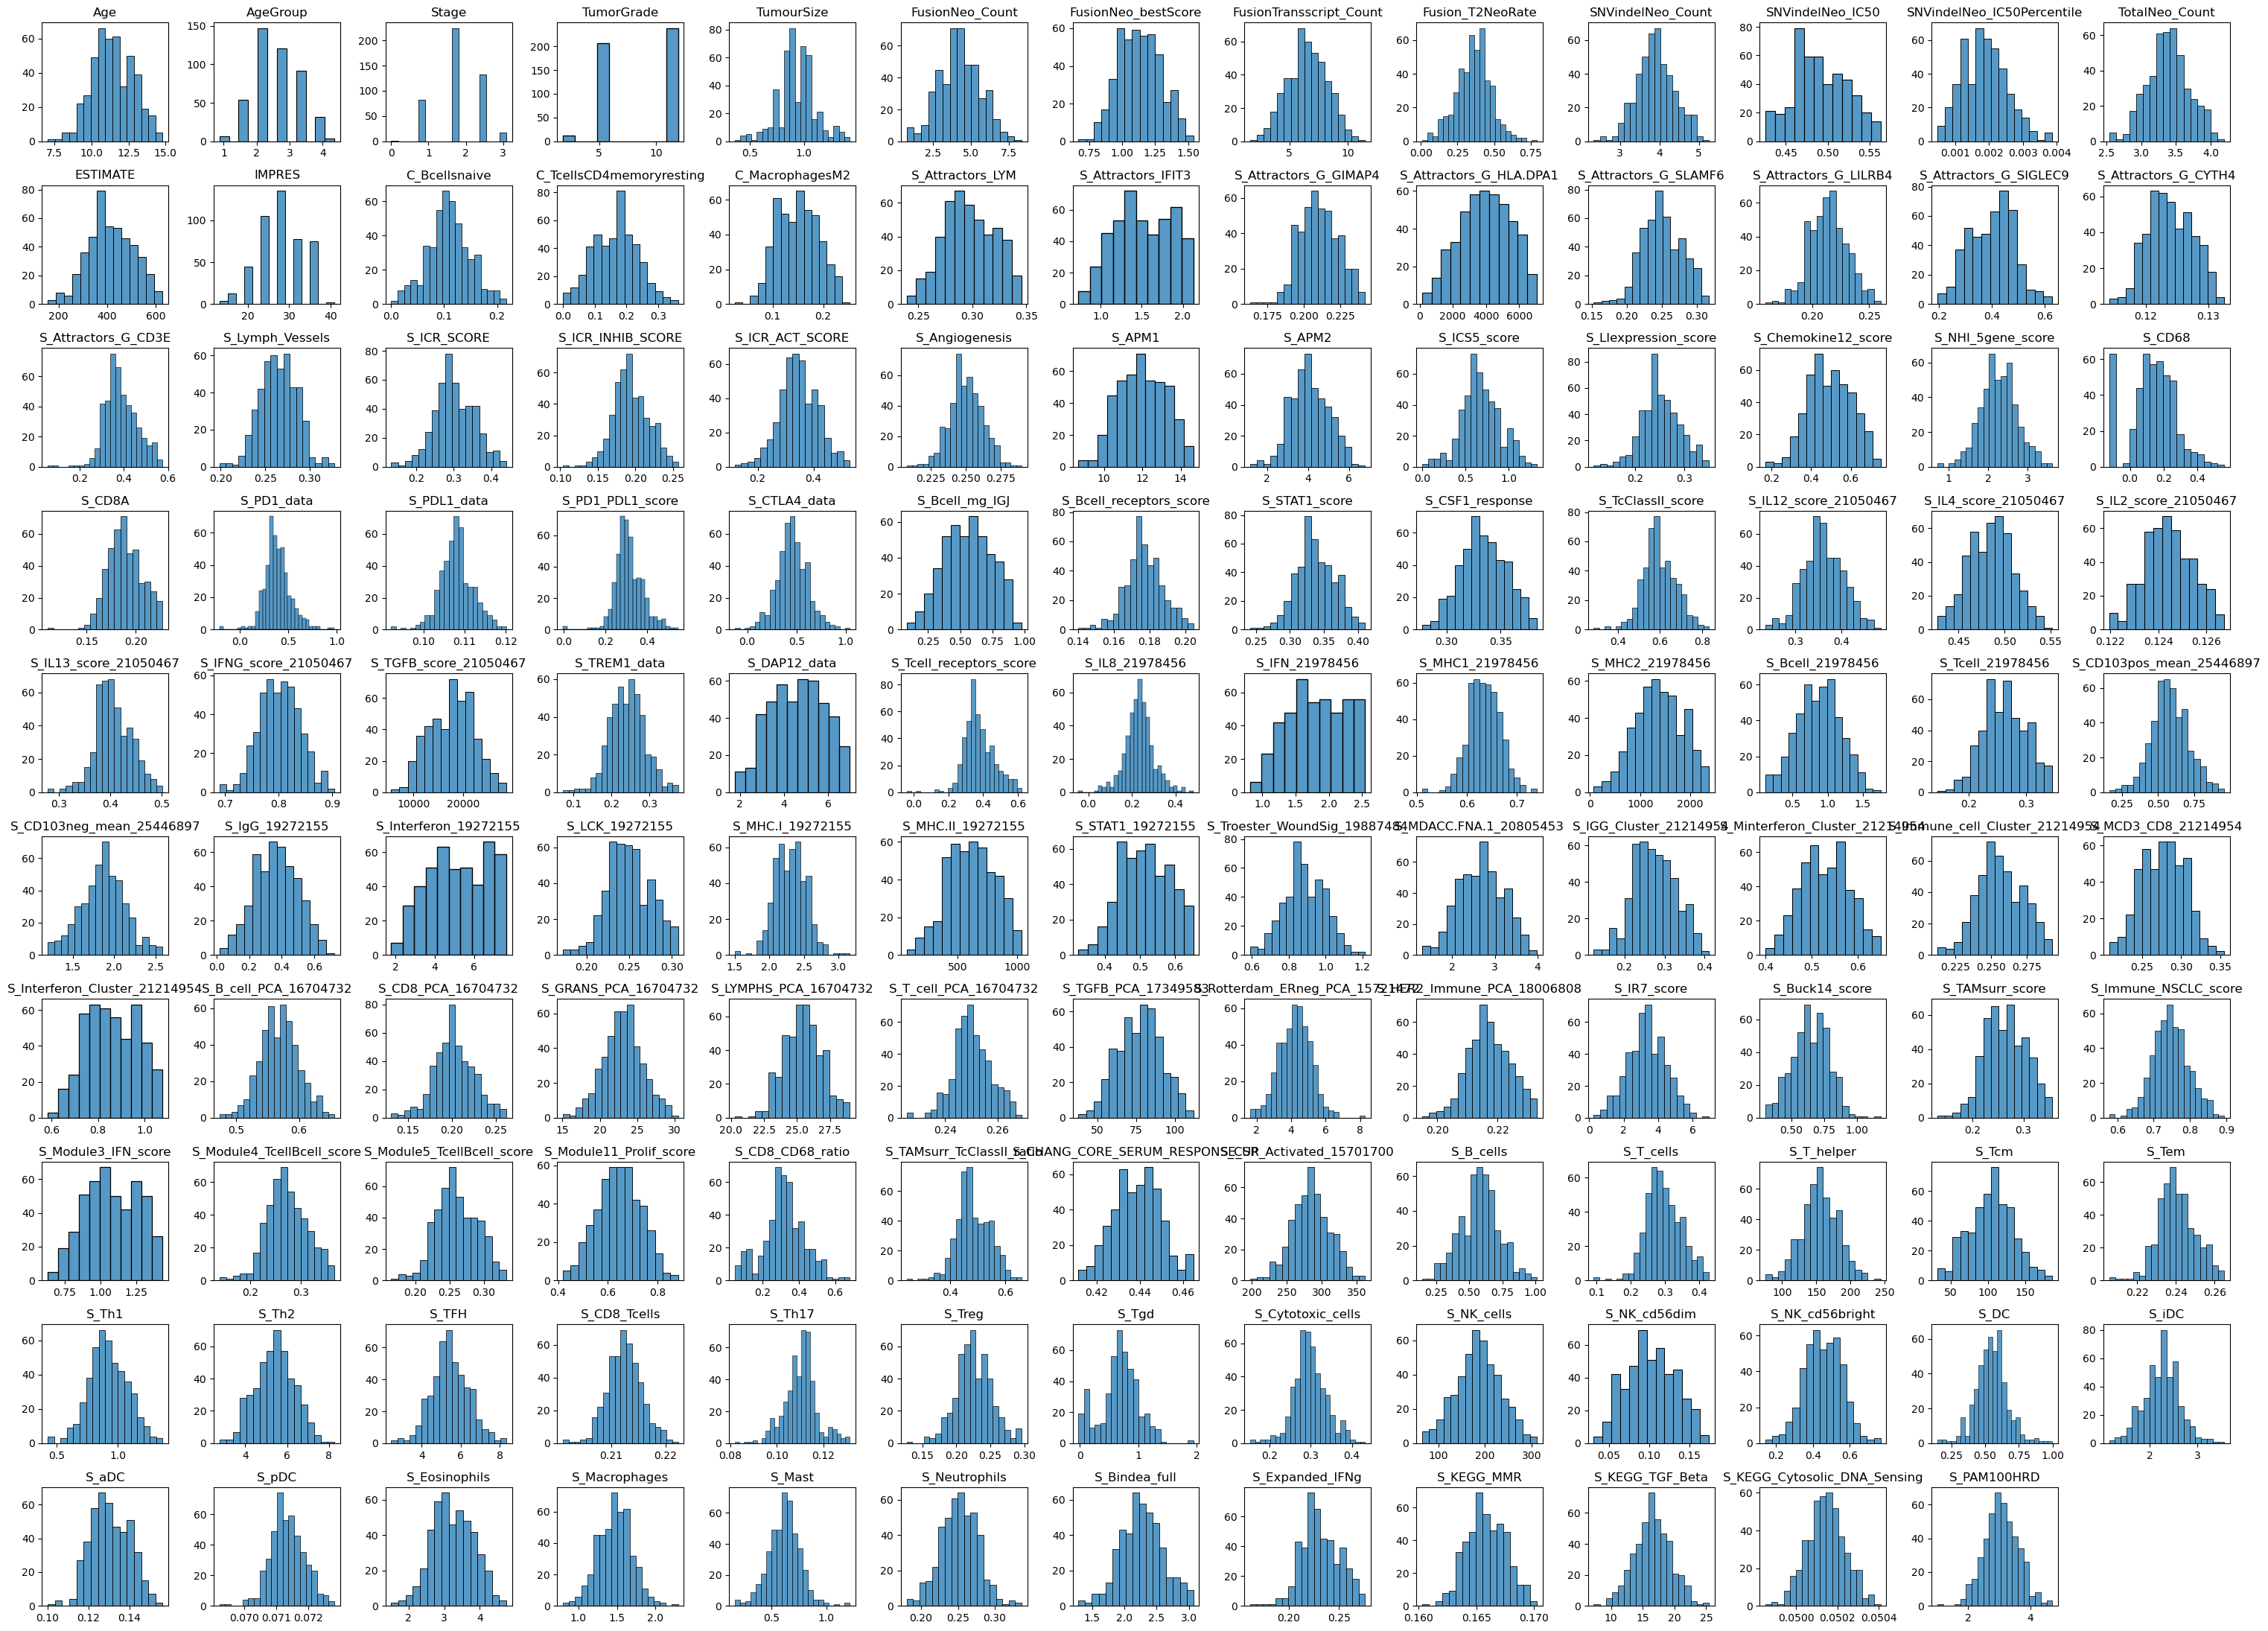

<Figure size 640x480 with 0 Axes>

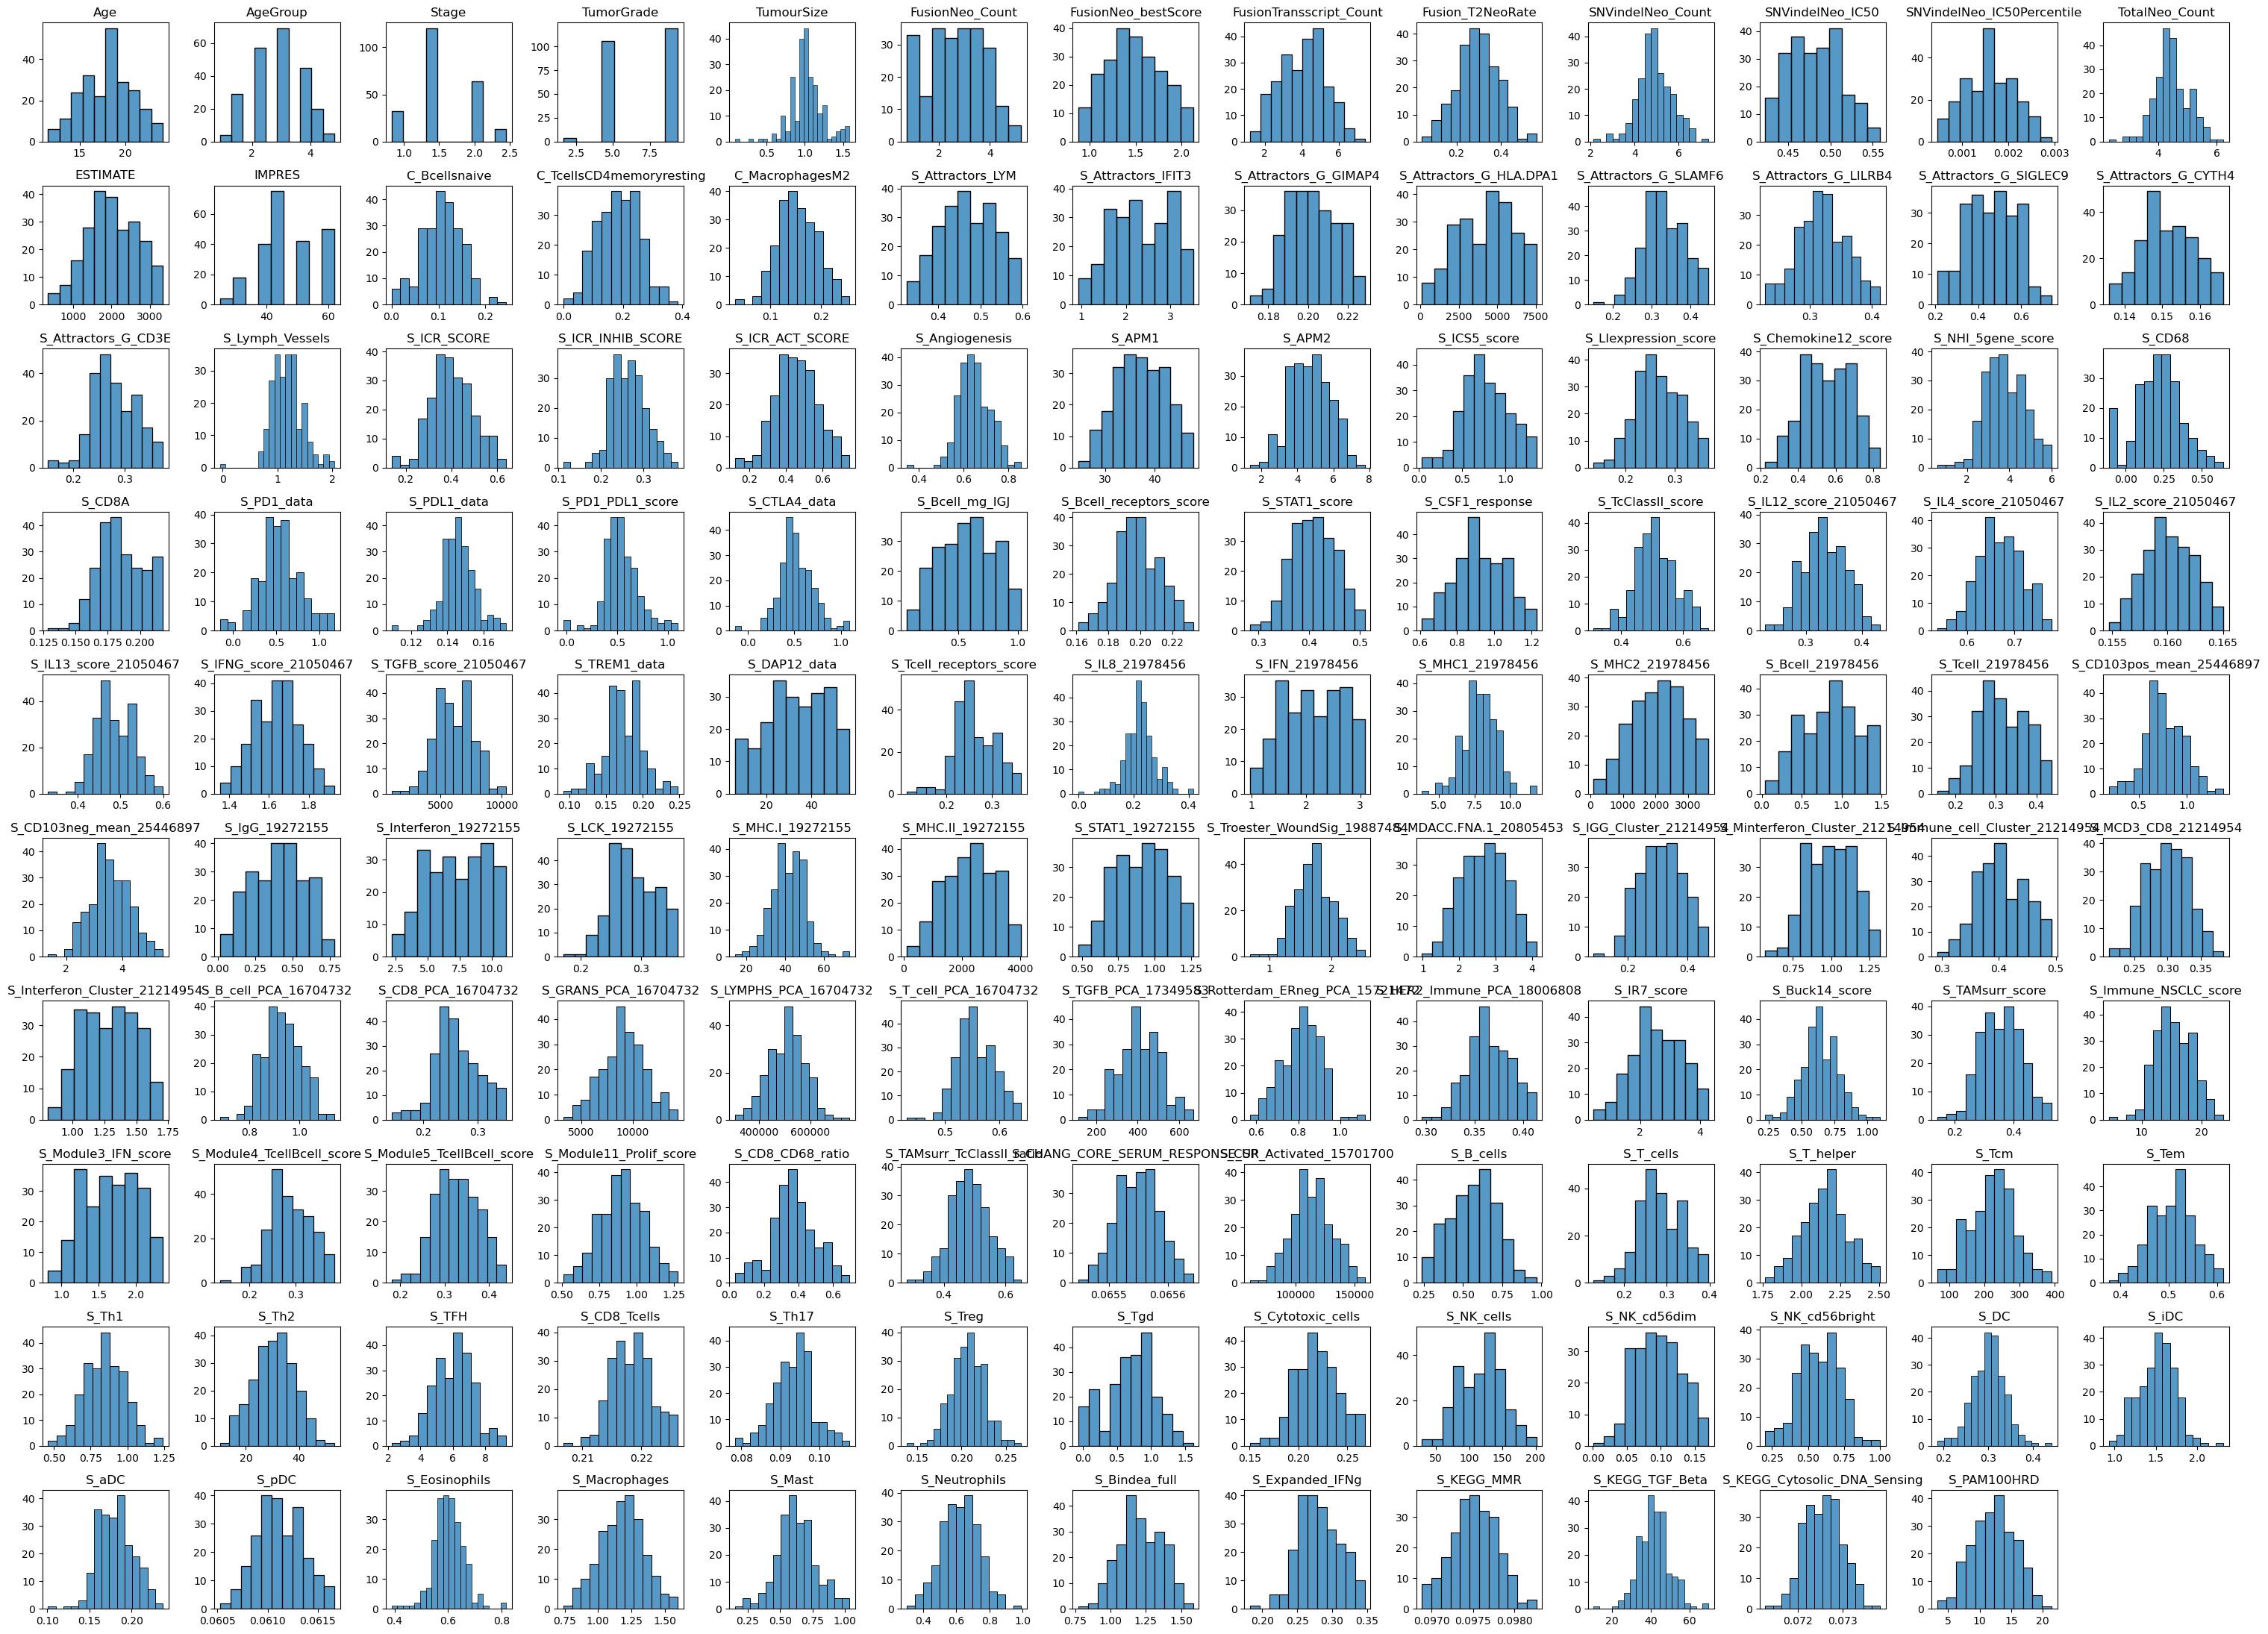

<Figure size 640x480 with 0 Axes>

In [17]:
#visualise distribution after yj transformation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
nrows = 10
ncols = 13

#define the plotting function
def visualise_distribution(df,batch):
    # Create a figure and a grid of subplots
    # Flatten the axes array for easy iteration
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 22))
    axes = axes.flatten()
    plt.title(f'Distribution of batch{batch} after Yeo-Johnson Transformation')

    # Plot histograms for each column
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=False, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout
    plt.tight_layout()
    plt.savefig(f'distribution_after_yj_b{batch}.png',dpi=600)
    plt.show()
    plt.clf()

#execute the function
visualise_distribution(df_input_yj_b1,1)
visualise_distribution(df_input_yj_b2,2)

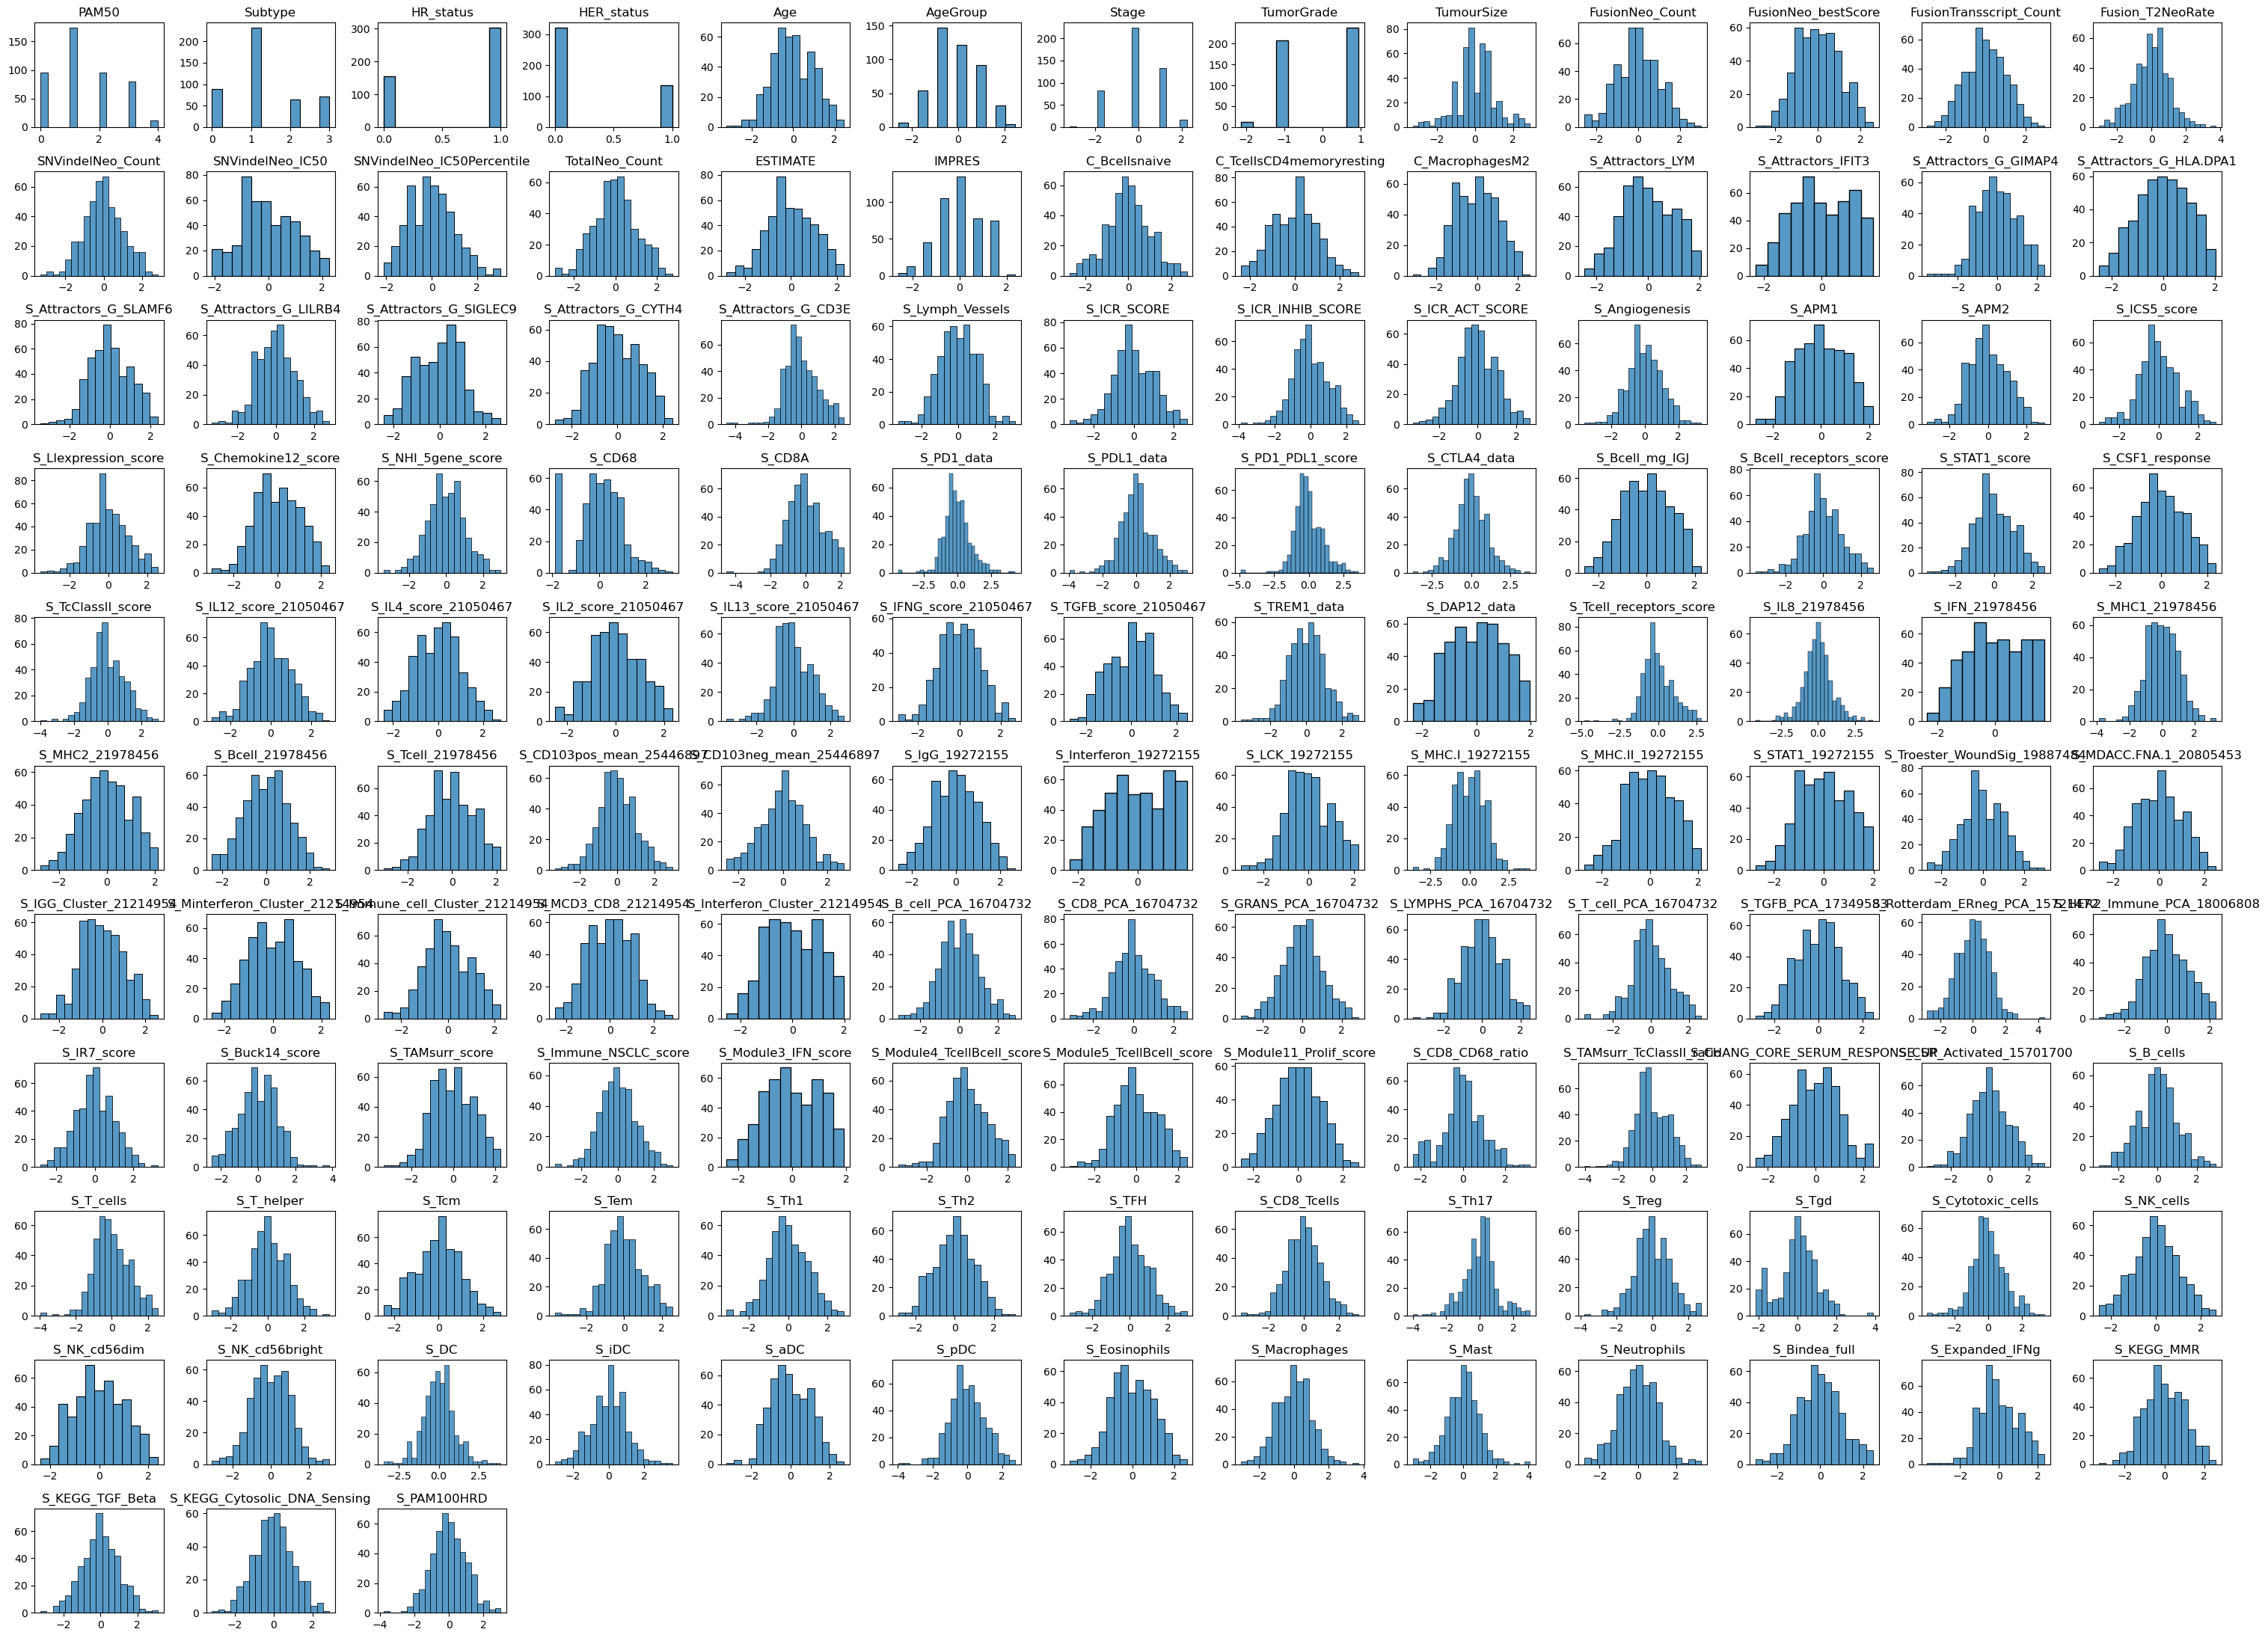

<Figure size 640x480 with 0 Axes>

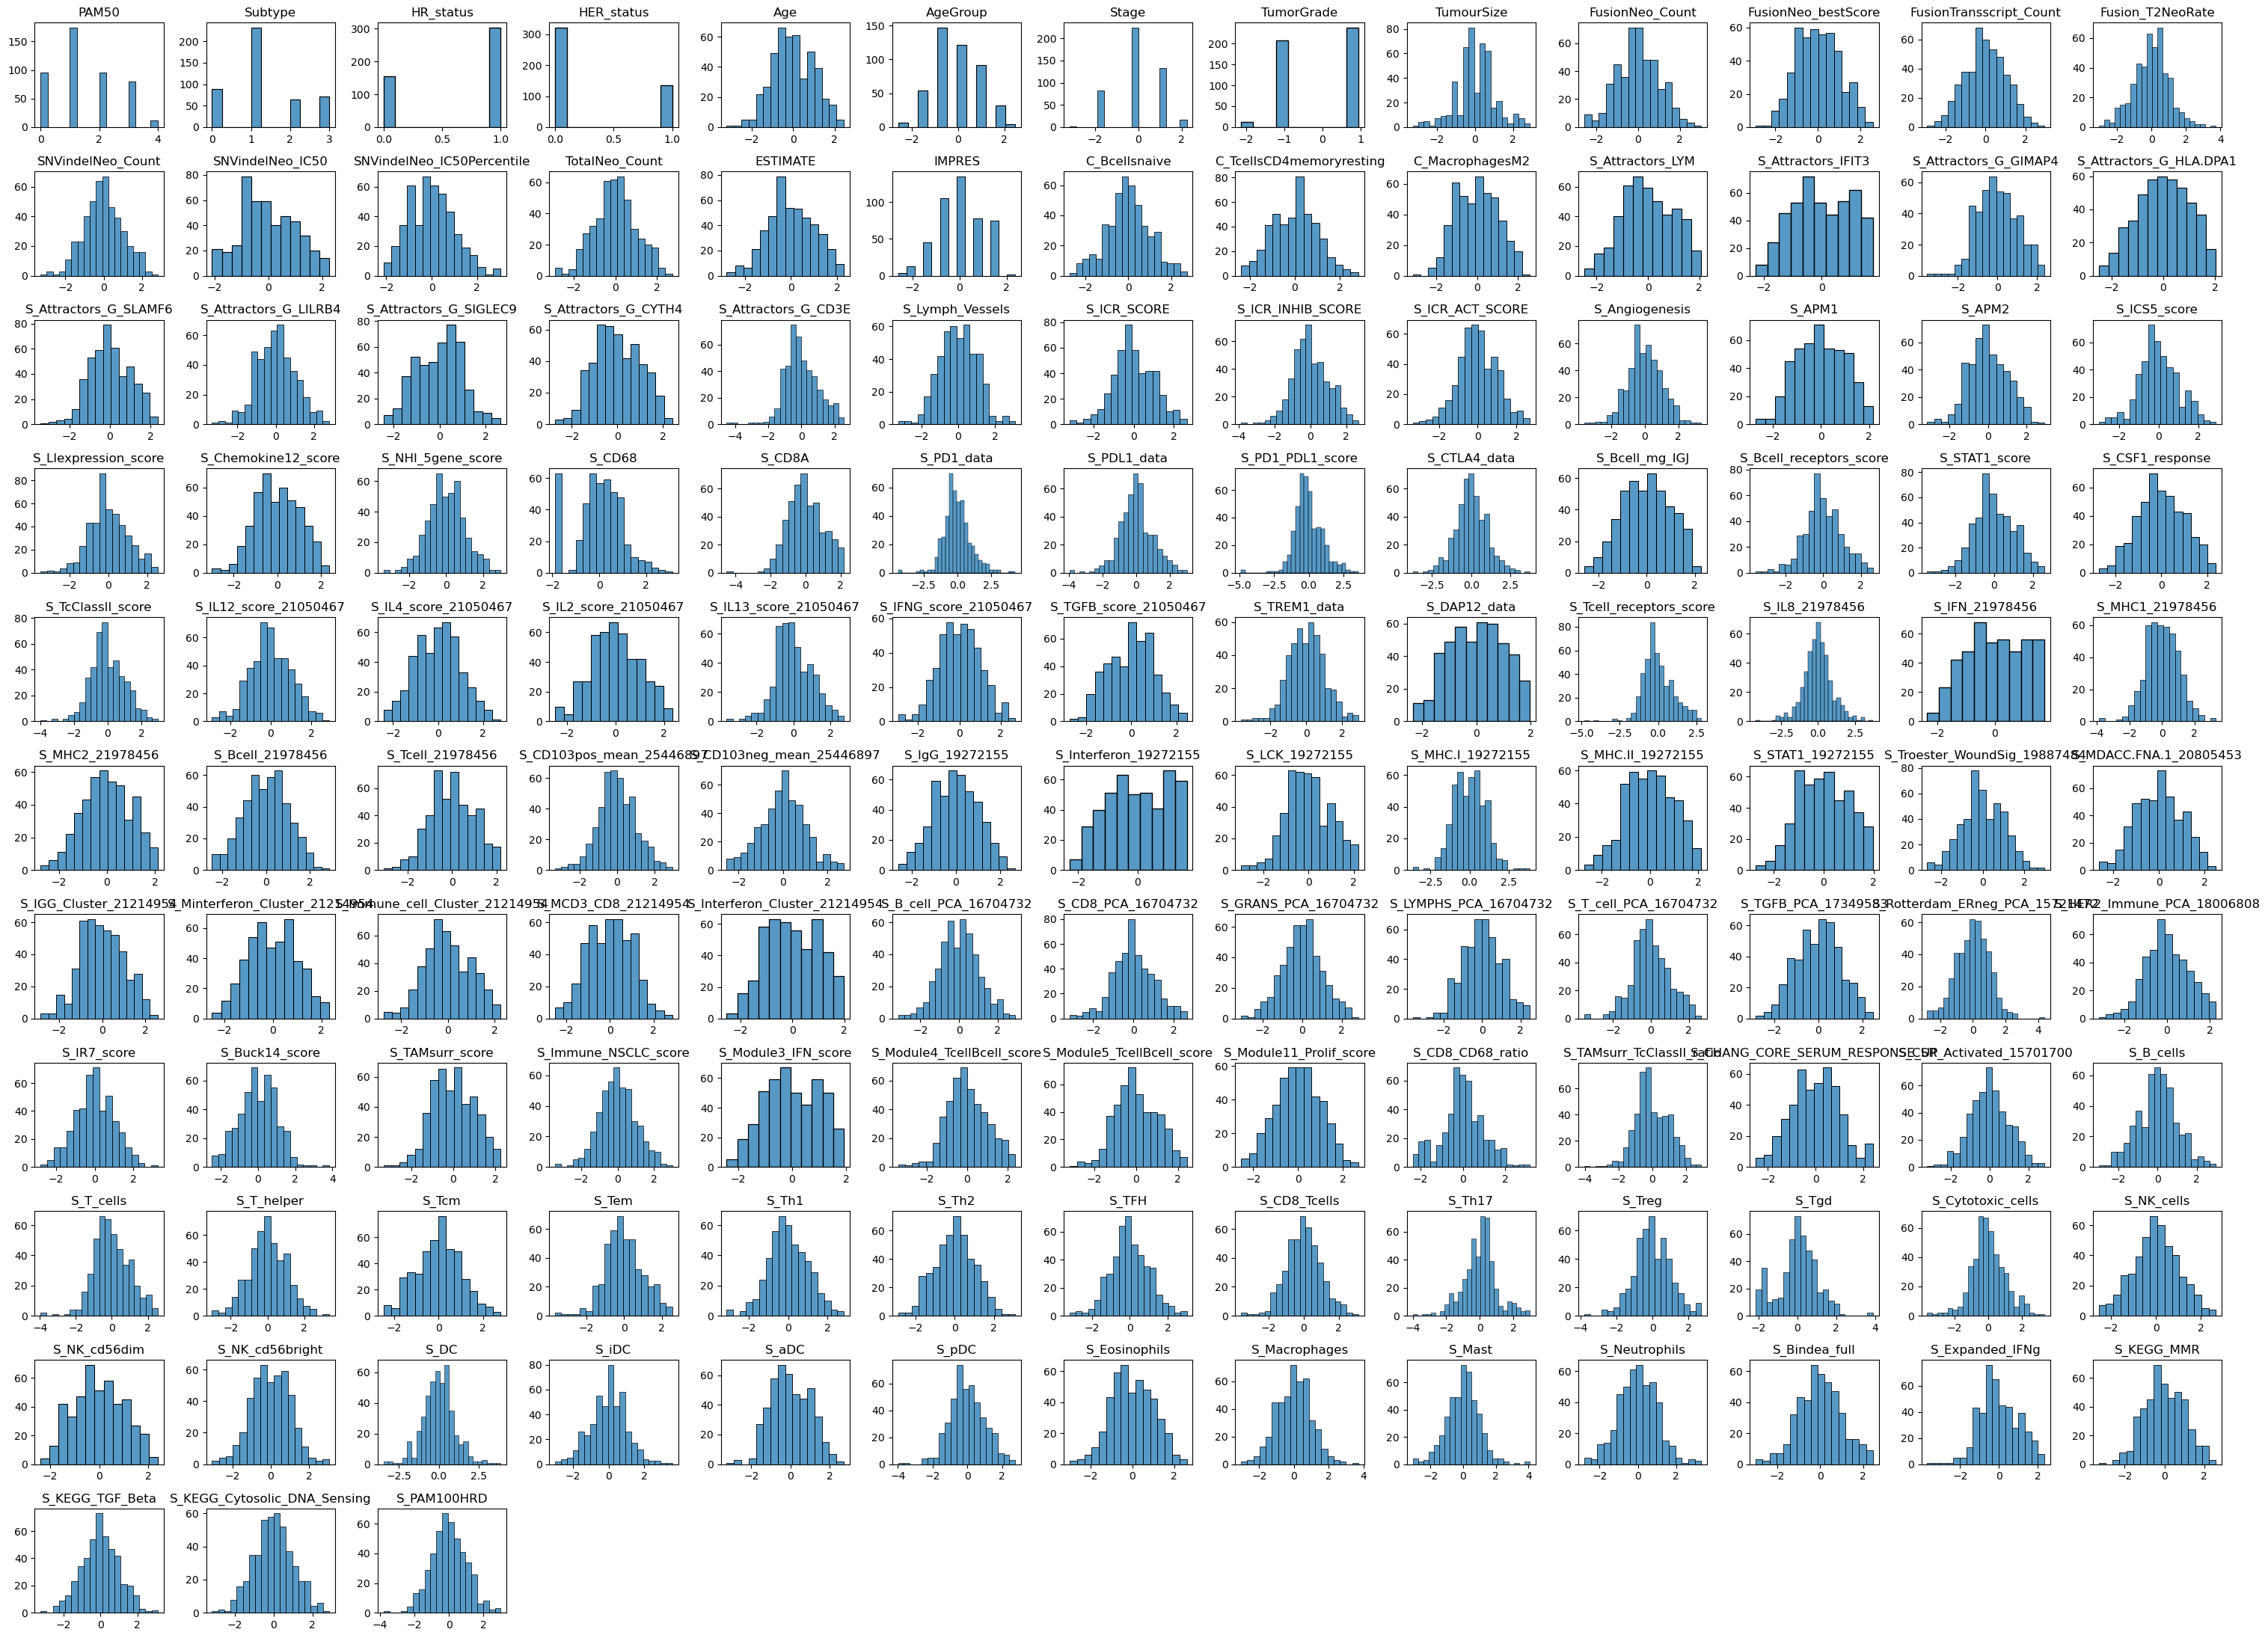

<Figure size 640x480 with 0 Axes>

In [27]:
#visualise distribution after yj+z transformation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Determine the number of rows and columns for the subplot grid
nrows = 11
ncols = 13

#define the plotting function
def visualise_distribution(df,batch):
    # Create a figure and a grid of subplots
    # Flatten the axes array for easy iteration
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 22))
    axes = axes.flatten()
    plt.title(f'Distribution of batch{batch} after Yeo-Johnson + z-Transformation')

    # Plot histograms for each column
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=False, ax=axes[i])
        axes[i].set_title(column)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # Adjust the layout
    plt.tight_layout()
    plt.savefig(f'distribution_after_yjz_b{batch}.png',dpi=600)
    plt.show()
    plt.clf()

#execute the function
visualise_distribution(df_input_yjz_b1,1)
visualise_distribution(df_input_yjz_b1,2)

In [28]:
#included the raw values of clinical variables as well - for UMAP
batch1_forexport=pd.concat([df_input_clean_b1.iloc[:,:11],df_input_yjz_b1],axis=1)
batch2_forexport=pd.concat([df_input_clean_b2.iloc[:,:11],df_input_yjz_b2],axis=1)

batch1_forexport.to_csv('data_batch1_cleanedV2.tsv', index=False, sep="\t")
batch2_forexport.to_csv('data_batch2_cleanedV2.tsv', index=False, sep="\t")

In [30]:
batch1_forexport.iloc[:,:20]

,ID,Batch,PAM50,Subtype,HR_status,HER_status,Age,AgeGroup,Stage,TumorGrade,TumourSize,PAM50,Subtype,HR_status,HER_status,Age,AgeGroup,Stage,TumorGrade,TumourSize
0,SD0012,Batch_1,LumB,HR+/HER2-,HR+,HER2-,50.0,41-50,2.0,2.0,2.3,3,1,1,0,-0.212495,-0.606949,-0.203496,-0.960822,-0.297348
1,SD0014,Batch_1,LumA,HR+/HER2-,HR+,HER2-,58.0,51-60,2.0,2.0,2.5,1,1,1,0,0.464197,0.240136,-0.203496,-0.960822,-0.123064
2,SD0015,Batch_1,LumA,HR+/HER2-,HR+,HER2-,46.0,41-50,1.0,2.0,1.8,1,1,1,0,-0.572332,-0.606949,-1.580352,-0.960822,-0.814939
4,SD0017,Batch_1,LumB,HR+/HER2-,HR+,HER2-,54.0,51-60,2.0,2.0,2.5,3,1,1,0,0.132470,0.240136,-0.203496,-0.960822,-0.123064
5,SD0018,Batch_1,LumB,HR+/HER2+,HR+,HER2+,58.0,51-60,2.0,3.0,3.0,3,3,1,1,0.464197,0.240136,-0.203496,0.942923,0.252155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,SD1588,Batch_1,LumA,HR+/HER2-,HR+,HER2-,43.0,41-50,2.0,2.0,1.0,1,1,1,0,-0.853153,-0.606949,-0.203496,-0.960822,-2.032600
515,SD1589,Batch_1,Her2,HR-/HER2+,HR-,HER2+,69.0,61-70,3.0,3.0,3.0,2,2,0,1,1.318522,1.028061,1.055399,0.942923,0.252155
516,SD1590,Batch_1,LumA,HR+/HER2-,HR+,HER2-,73.0,71-80,3.0,2.0,3.5,1,1,1,0,1.611088,1.769965,1.055399,-0.960822,0.561020
517,SD1591,Batch_1,LumA,HR+/HER2-,HR+,HER2-,48.0,41-50,3.0,3.0,4.5,1,1,1,0,-0.390439,-0.606949,1.055399,0.942923,1.043309
